# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


# Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
# Add/import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# adding statsmodels to validate the parameters only 
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the Data

In [2]:
# read the csv file data
df = pd.read_csv("day.csv")

# check the data loaded properly or not
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# check the description of data using describe() method
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [4]:
# null check or missing value check and if required then we will do the data imputation 

no_of_missing_values = df.isnull().sum()
print(no_of_missing_values)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [5]:
# we do not have any null values in any columns. Now we are going to check the columns datatype using info() method

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Step 2: Remove unwanted columns

#### By looking at data we need to remove couple of columns which listed below-
    1. instant : This is an index column which is not required for our model
    2. casual and registered: These columns data addition is present in cnt column basically cnt = casual + registered and cnt is our target variable. So we should not consider these  
    3. dteday and mnth: These columns have same data so we should remove one to avoid the confusion. So we decided to remove "dteday"
    

In [6]:
df.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)

In [7]:
# after dropping the unwanted columns from data we should check the data

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Step 3: Find the different type of variables(Categorical and Numerical) and replace existing data with appropriate values

### By analysing the data we can see there are catagorical and numerical variables which are listed below-

#### Categorical Variables
1. season
2. yr
3. mnth
4. holiday
5. weekday
6. workingday
7. weathersit

#### Numerical Variables
1. temp
2. atemp
3. hum
4. windspeed
5. cnt

In [8]:
# We are going to replace "season" variable data with appropriate values on the basis of data description which we have 
# season : season (1:spring, 2:summer, 3:fall, 4:winter)

df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)

In [9]:
# check the replaced values 

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
# Now We are going to replace next "weekday" variable data with appropriate values on the basis of data description which we have 
# weekday : day of the week

df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)

# check the updated values

df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
# Now We are going to replace next "weathersit" variable data with appropriate values on the basis of data description which we have 
# weathersit : 
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

df['weathersit'].replace({1:"Clear_Few_Clouds",2:"Mist_Cloudy",3:"Light_Snow_Light_Rain_Thunderstorm",4:'Heavy_Rain_Ice Pallets_Thunderstorm_Mist_Snow_Fog'},inplace=True)

# Check the udpated values

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Few_Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few_Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few_Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
# we need to check the current data information using info() method

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


# Step 4: Perform the Exploratory Data Analysis(EDA)

## Data visualization 

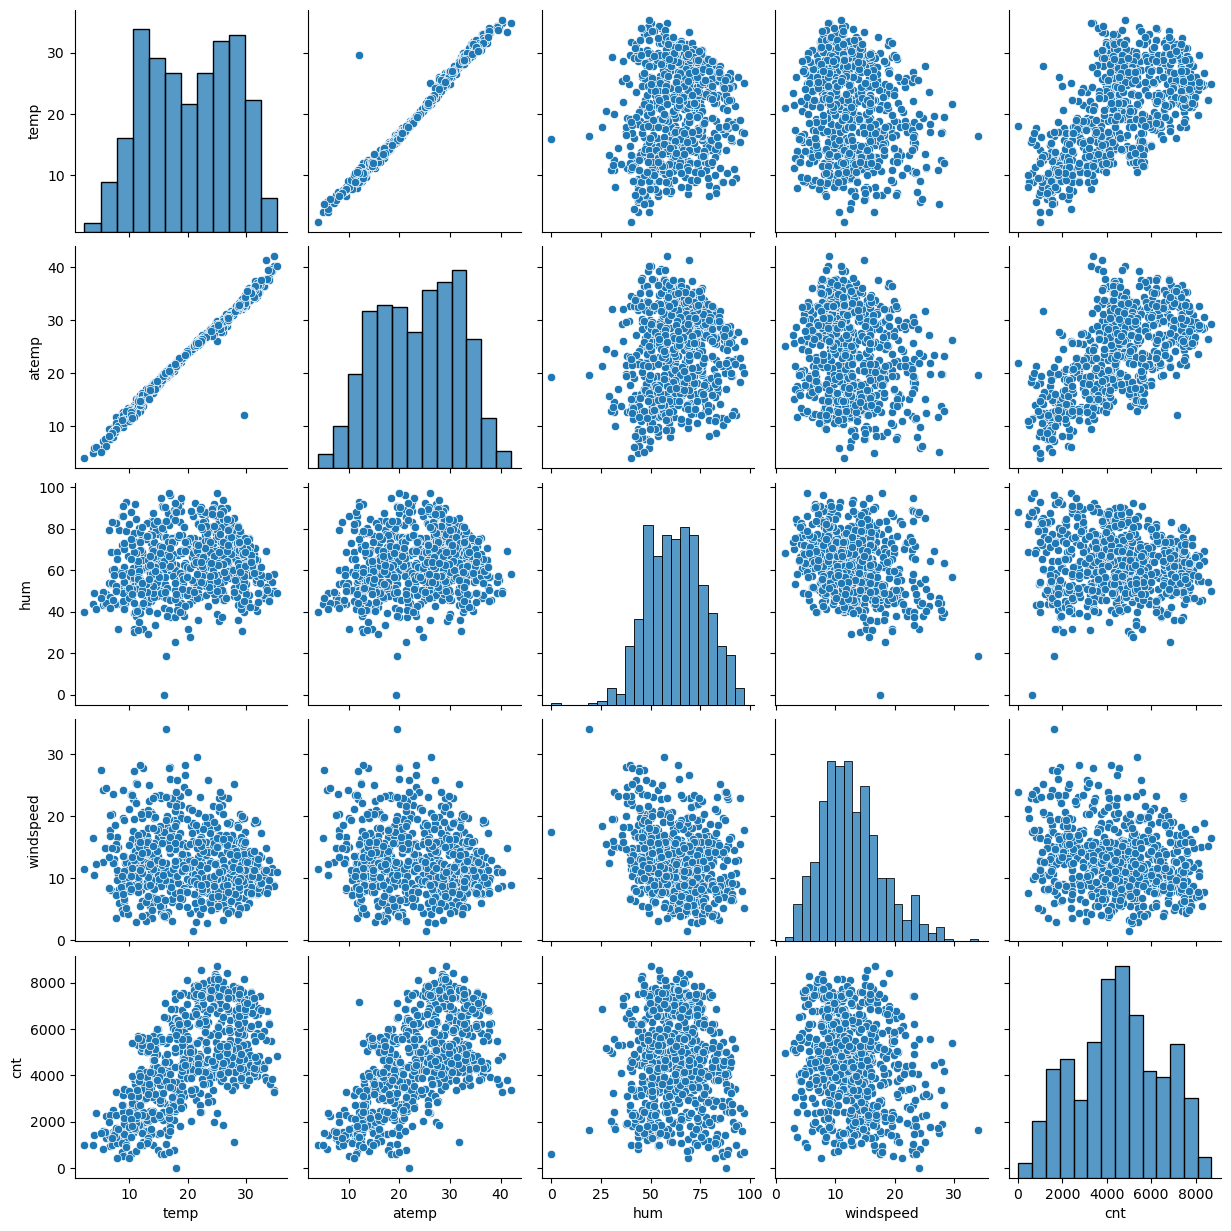

In [13]:
# Data visualization for Numerical variables to understand the relations using seaborn library. For this we are using pairplots

sns.pairplot(df, vars=['temp', 'atemp', 'hum', 'windspeed','cnt'])
plt.show()


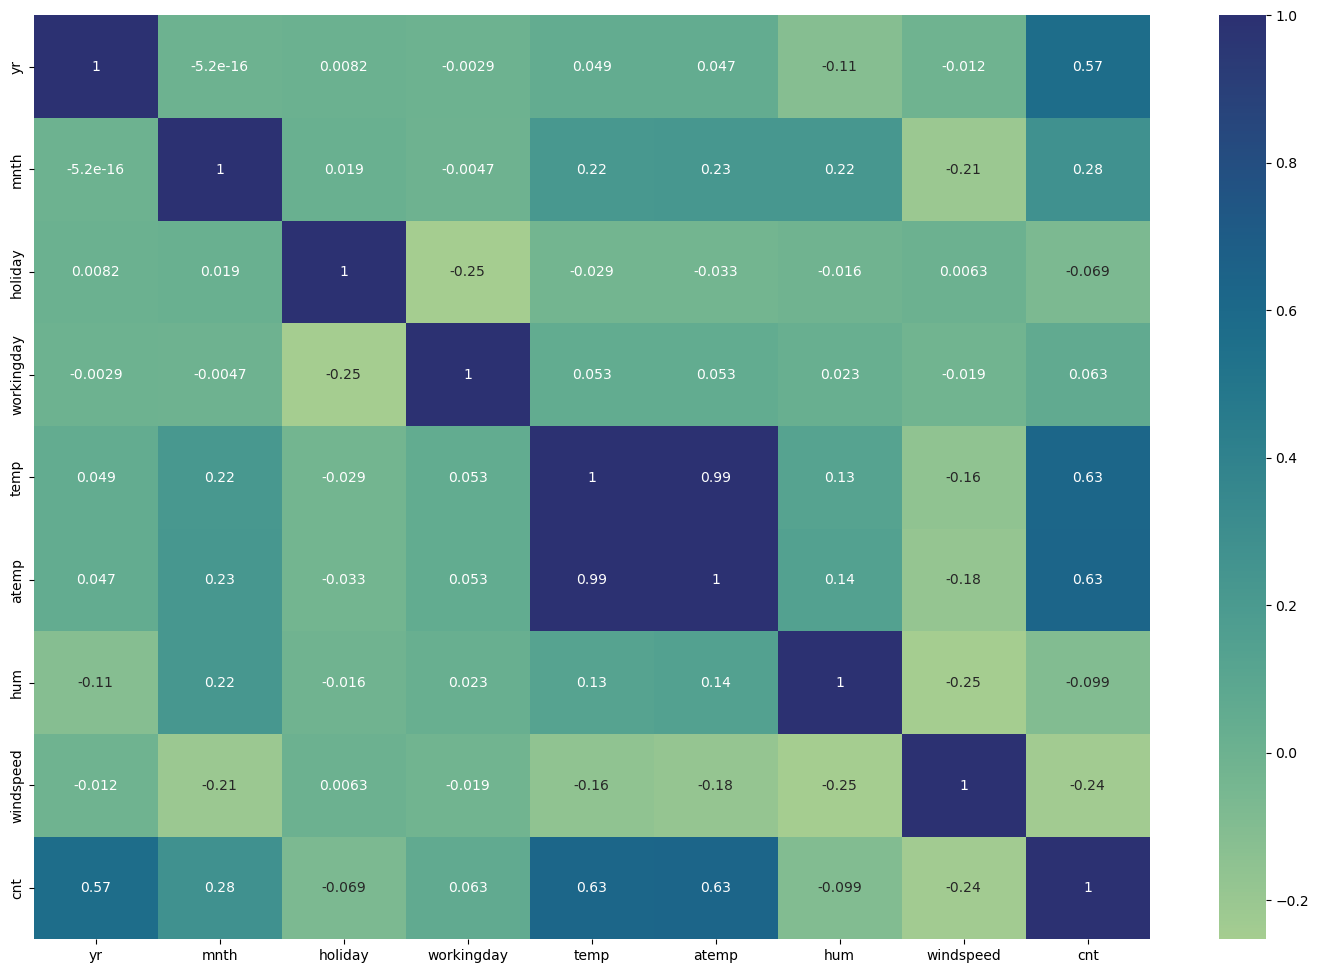

In [14]:
# By looking at above pairplot we can see that two variables temp and atemp have relationship. 
# So, now we are going to check the correlation between the variables using heatmap

plt.figure(figsize=(18,12))

sns.heatmap(df.corr(), annot=True,cmap='crest')

plt.show()


#### A high correlation between variables temp and atemp, such as a correlation coefficient of 0.99 (close to 1), indicates a strong linear relationship between the two variables. So, we are going to drop temp and will consider atemp because there are several reasons why we consider dropping variable temp despite its high correlation with variable atemp i.e. to avoid duplication, coliniarity, redundancy

In [15]:
# lets drop temp variable from data

df.drop(['temp'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_Cloudy,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_Cloudy,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Few_Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few_Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few_Clouds,11.46350,43.6957,12.522300,1600


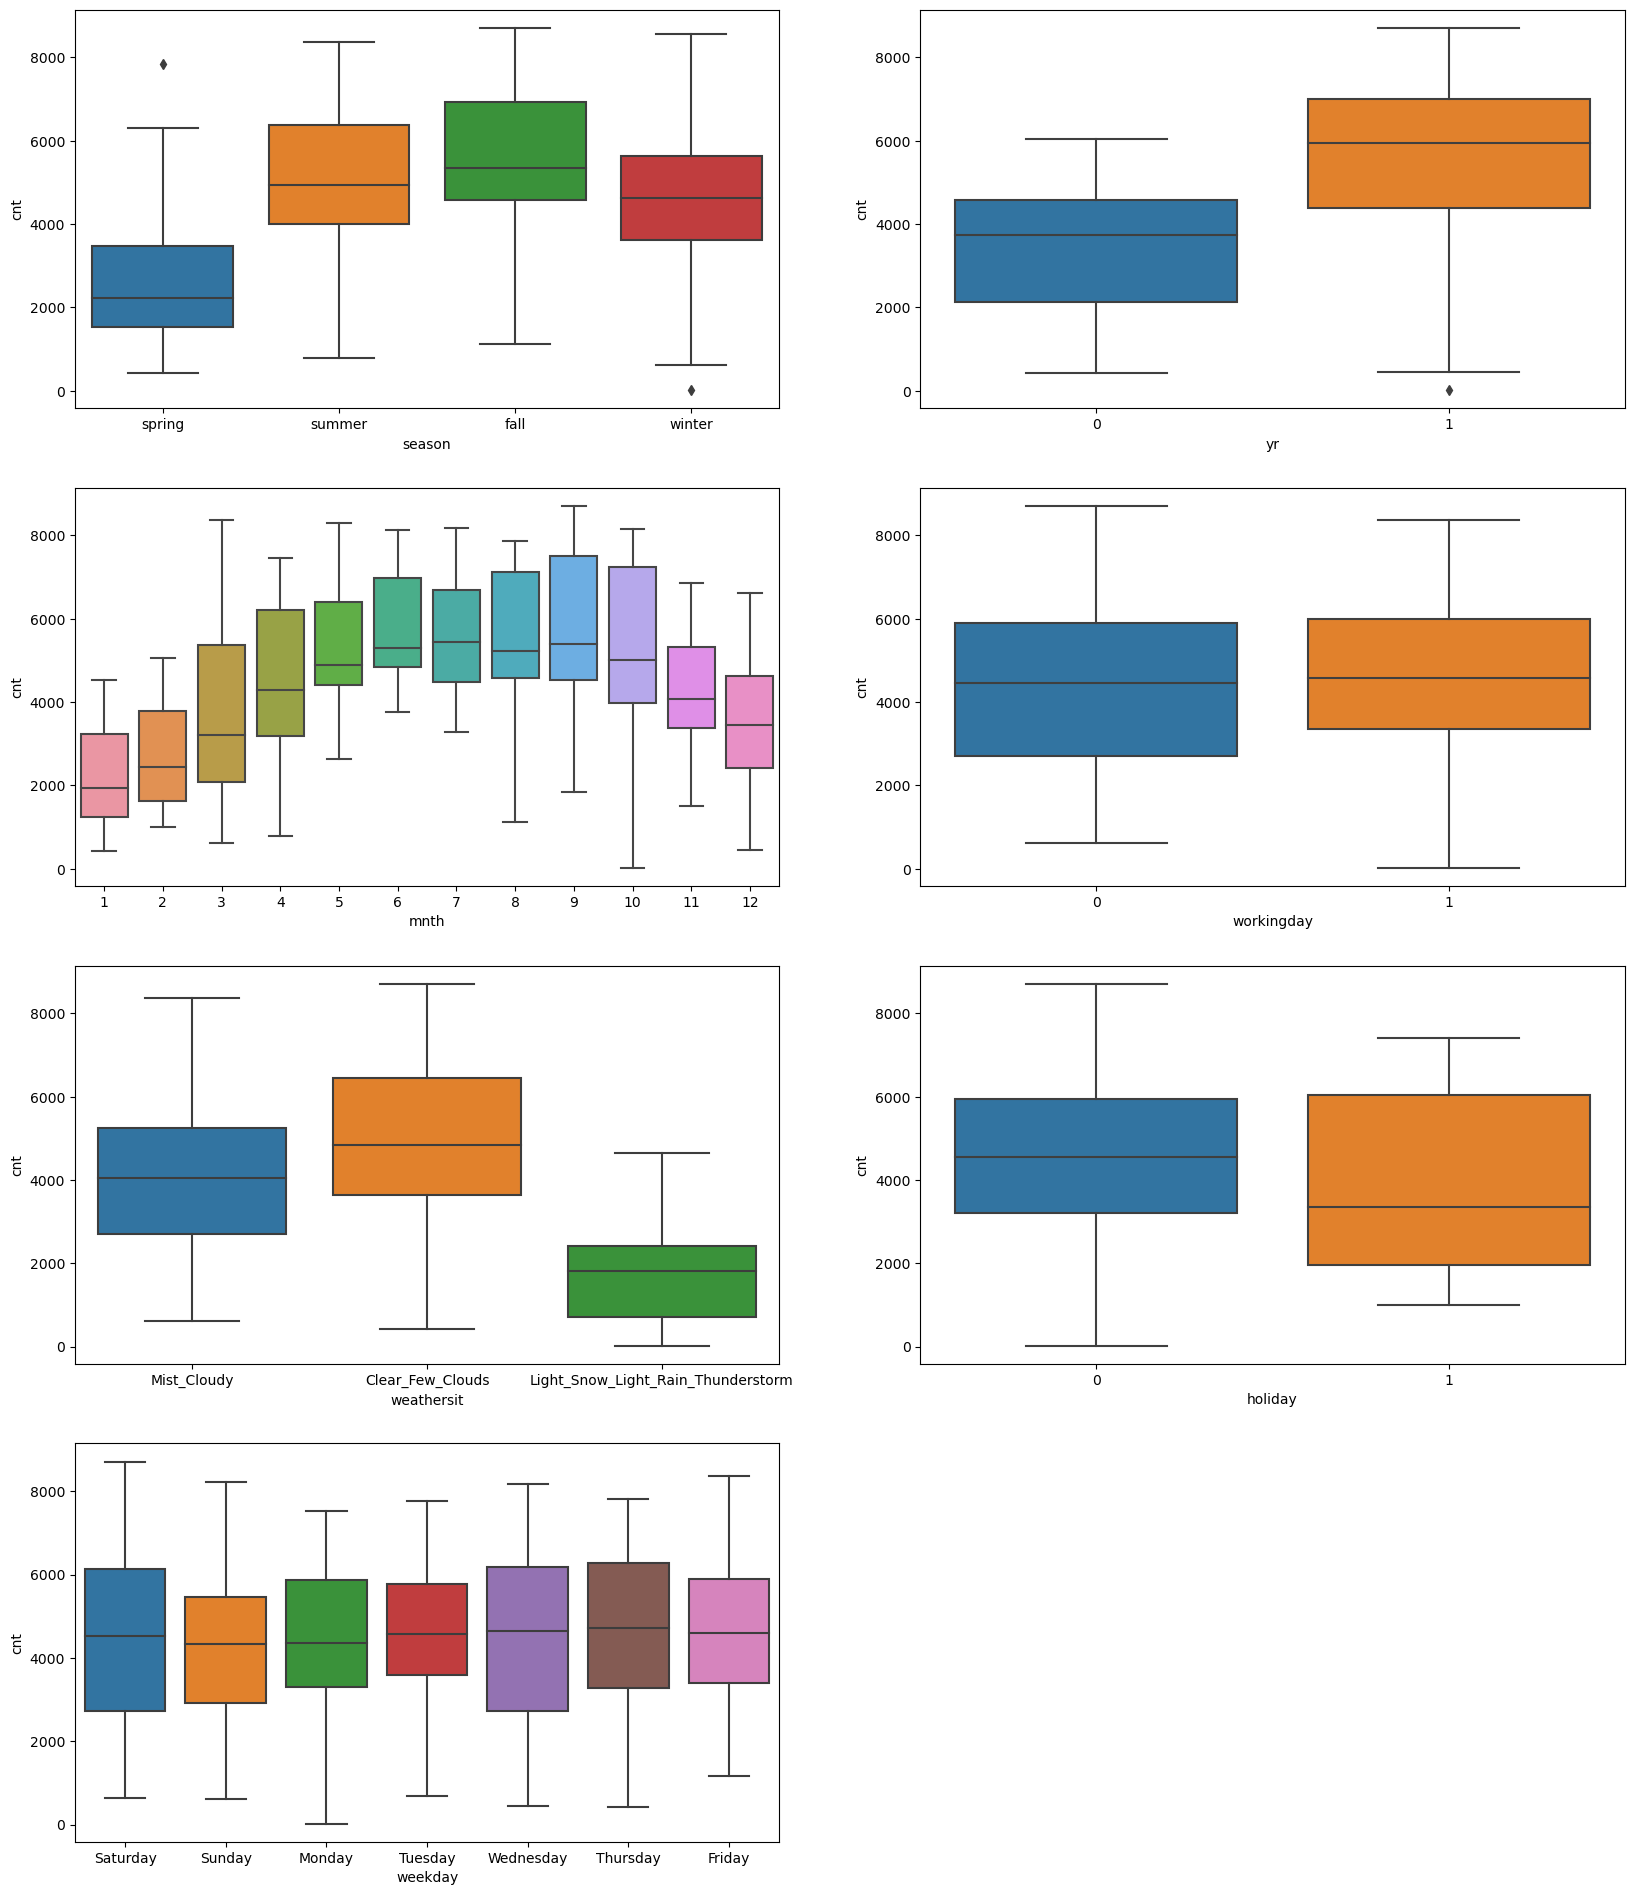

In [16]:
# Now visualize the categorical variables to understand data in more details using seaborn library subplot

plt.figure(figsize=(20, 30))

# For season variable
plt.subplot(5,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)#yr','mnth','workingday','weathersit','weekday'

# For yr variable
plt.subplot(5,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)

# For mnth variable
plt.subplot(5,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)

# For workingday variable
plt.subplot(5,2,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)

# For weathersit variable
plt.subplot(5,2,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)


# For holiday variable
plt.subplot(5,2,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)


# For Weekday variable
plt.subplot(5,2,7)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)

plt.show()


# Step 5: Data preparation for Modeling

In [17]:
# Create dummy variables for categorical variable

# For season
Season_Mode=pd.get_dummies(df['season'],drop_first=True)

# For Weather
Climate=pd.get_dummies(df['weathersit'],drop_first=True)

# For Weekday
Day=pd.get_dummies(df['weekday'],drop_first=True)

# For mnth
Month=pd.get_dummies(df['mnth'],drop_first=True)


In [18]:
# Concatenate dummy variables with the data 

df=pd.concat([df,Season_Mode],axis=1)
df=pd.concat([df,Climate],axis=1)
df=pd.concat([df,Day],axis=1)
df=pd.concat([df,Month],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   season                              730 non-null    object 
 1   yr                                  730 non-null    int64  
 2   mnth                                730 non-null    int64  
 3   holiday                             730 non-null    int64  
 4   weekday                             730 non-null    object 
 5   workingday                          730 non-null    int64  
 6   weathersit                          730 non-null    object 
 7   atemp                               730 non-null    float64
 8   hum                                 730 non-null    float64
 9   windspeed                           730 non-null    float64
 10  cnt                                 730 non-null    int64  
 11  spring                              730 non-n

In [19]:
# Now after adding dummy variables for season, mnth, weathersit and weekday 
# we are going to delete season, mnth, weathersit and weekday

df.drop(['season'],axis=1,inplace=True)
df.drop(['weathersit'],axis=1,inplace=True)

df.drop(['weekday'],axis=1,inplace=True)

df.drop(['mnth'],axis=1,inplace=True)

df.head()



,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# To avoid further errors related to columns names like below one
# Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types
# we need to convert all column/feature name as str

df.columns = df.columns.astype(str)

### Splitting data into train and test

In [21]:
# We have our dataset ready to split into train and test dataset using sklearn library

from sklearn.model_selection import train_test_split

# It allowing us to produce the same sequence of random numbers each time you run the code if the seed remains constant
# np.random.seed(0), ensures reproducibility. It initializes the random number generator in a particular state, 
# so subsequent calls to random number generation functions will produce the same sequence of random numbers.

np.random.seed(0)

# Generating train and test data
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)



In [22]:
# check df_train

df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [23]:
# check df_test

df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,1,22.85230,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,32.19710,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


### Rescaling the features

We are going to rescale all the numerical variables using Normalisation(Min-Max scaling) through sklearn library class "MinMaxScaler" 

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [25]:
# list all the numerical variables which required rescaling 

rescale_vars=['atemp','hum','windspeed','cnt']

df_train[rescale_vars] = scaler.fit_transform(df_train[rescale_vars])

In [26]:
# check the effect of rescaling on dataset

df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [27]:

# Now we are going to check the details of our train dataset using describe() method

df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step 6: Training the model

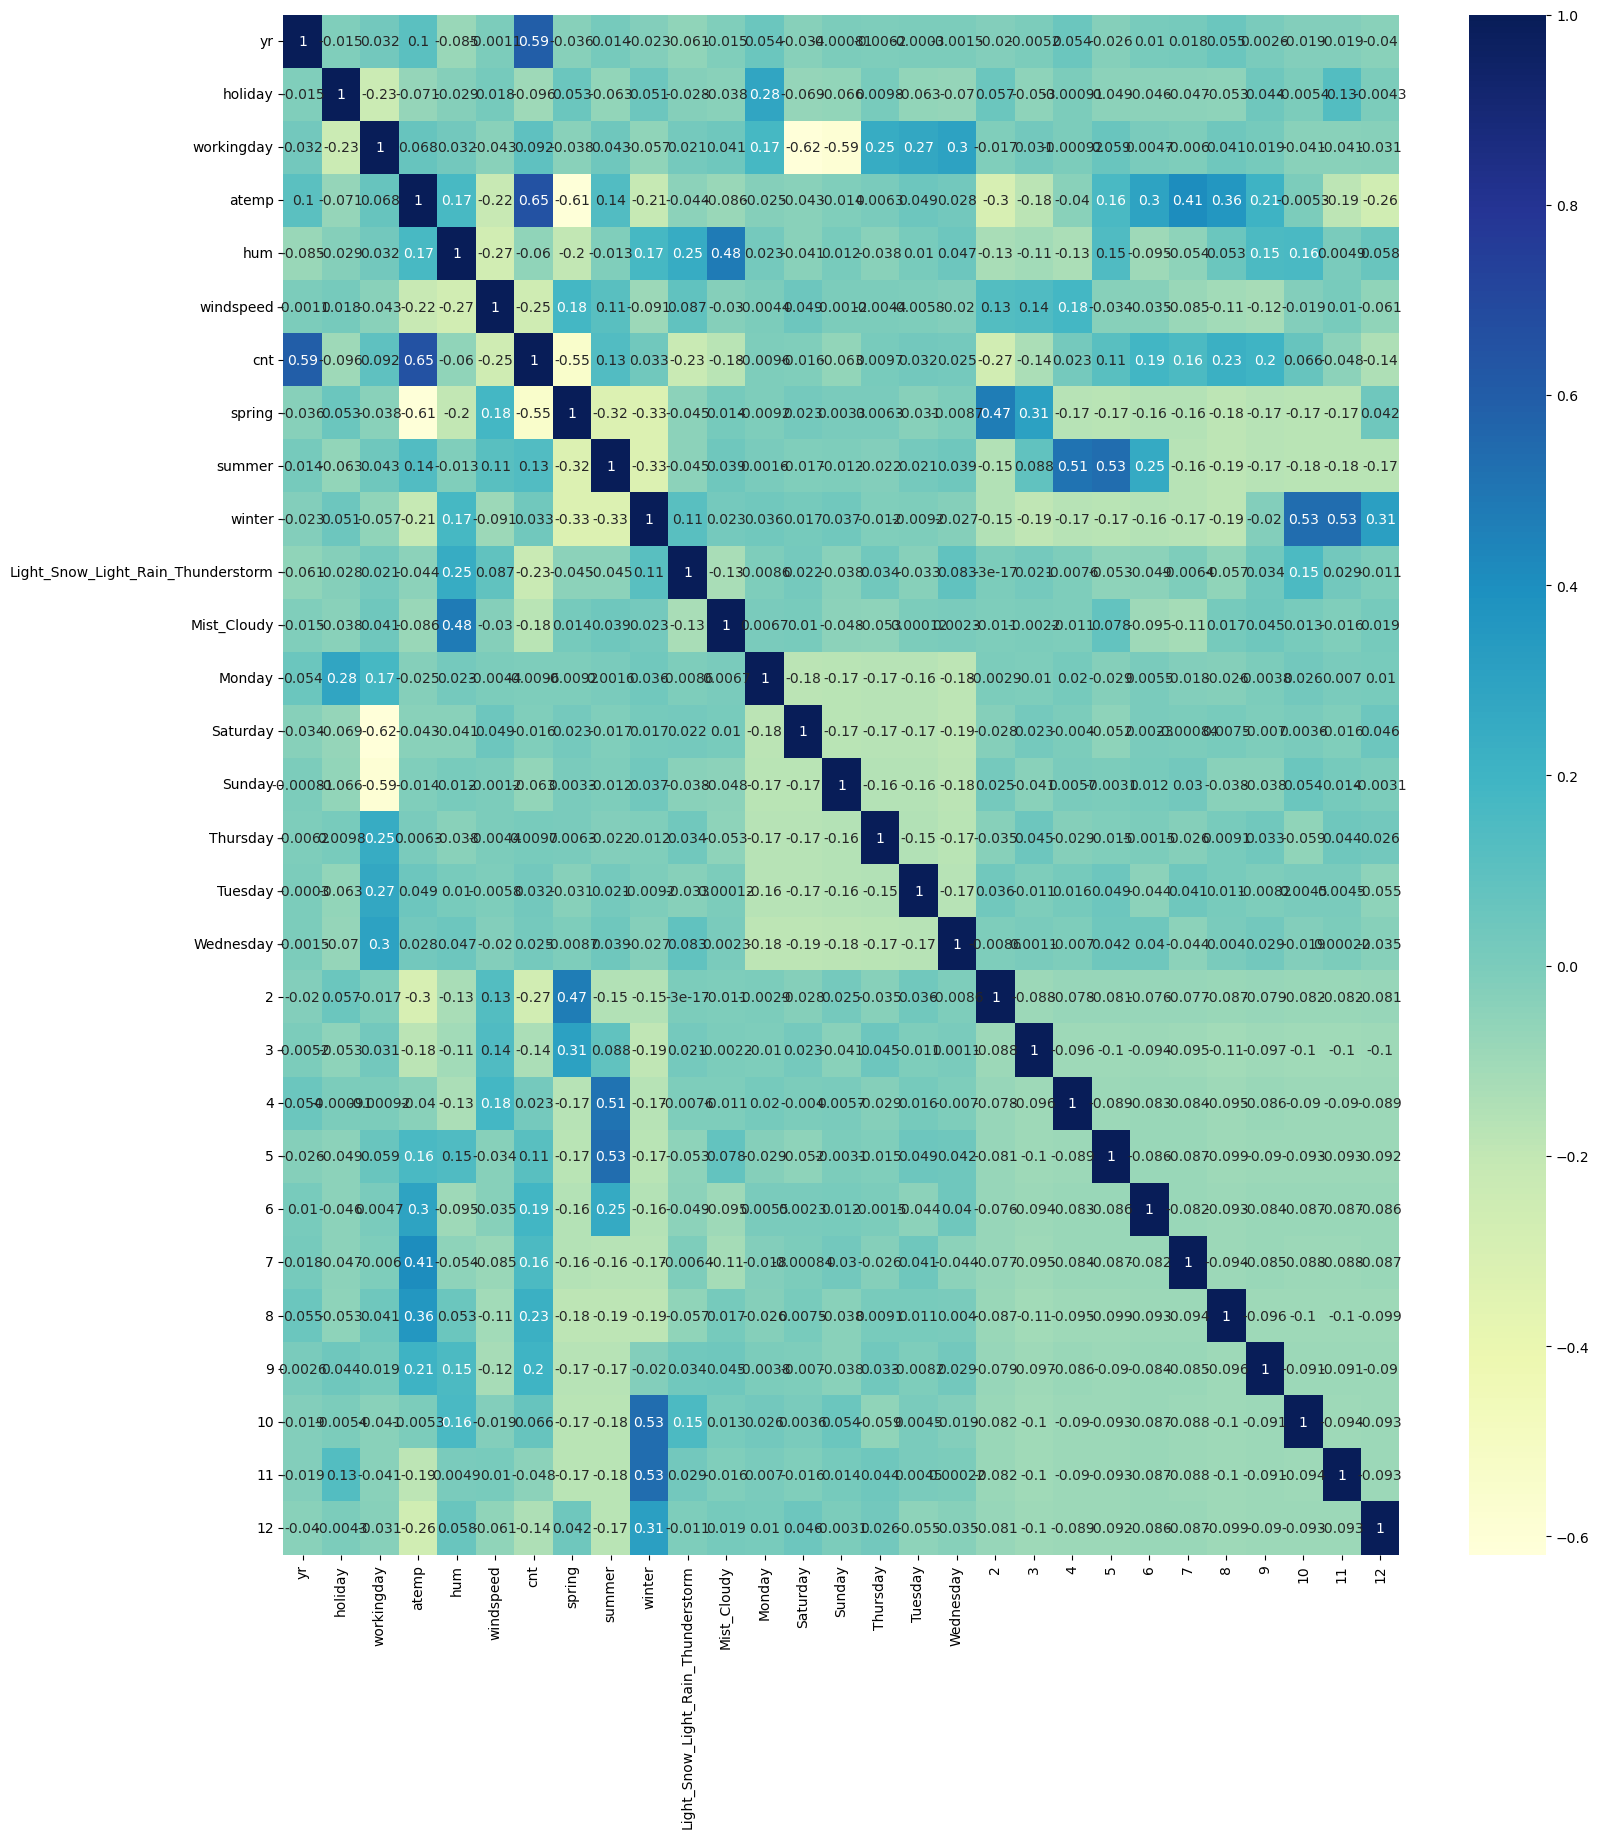

In [28]:
# before training the model lets check the correlation of our train dataset using seaborn heatmap 

plt.figure(figsize=(18,20))

sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')

plt.show()

In [29]:
# Now we are going to create X and y for train dataset y would be our target variable which is 'cnt' and X would be our rest variables/feature variables

y_train = df_train.pop('cnt')

X_train = df_train


In [30]:
# check y_train

y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [31]:
# check X_train

X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Light_Snow_Light_Rain_Thunderstorm,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


## Building our model 

In [32]:
# We are using RFE approach for Feature Selection 
# we will start with 15 variables to build a model

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)


In [33]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', True, 1),
 ('Light_Snow_Light_Rain_Thunderstorm', True, 1),
 ('Mist_Cloudy', True, 1),
 ('Monday', False, 11),
 ('Saturday', False, 3),
 ('Sunday', False, 10),
 ('Thursday', False, 13),
 ('Tuesday', False, 12),
 ('Wednesday', False, 14),
 ('2', False, 5),
 ('3', True, 1),
 ('4', True, 1),
 ('5', True, 1),
 ('6', True, 1),
 ('7', False, 6),
 ('8', True, 1),
 ('9', True, 1),
 ('10', False, 2),
 ('11', False, 8),
 ('12', False, 9)]

In [34]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'spring', 'winter',
       'Light_Snow_Light_Rain_Thunderstorm', 'Mist_Cloudy', '3', '4', '5', '6',
       '8', '9'],
      dtype='object')

In [35]:
X_train.columns[~rfe.support_]

Index(['workingday', 'summer', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', '2', '7', '10', '11', '12'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [36]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [37]:
# Adding a constant variable  
X_train_rfe_new = sm.add_constant(X_train_rfe)

In [38]:
lm = sm.OLS(y_train,X_train_rfe_new).fit()   # Running the linear model

In [39]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.6
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          8.06e-186
Time:                        16:54:26   Log-Likelihood:                 506.64
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     494   BIC:                            -913.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [40]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.72
2,atemp,15.52
4,windspeed,4.56
5,spring,3.52
6,winter,3.21
8,Mist_Cloudy,2.26
0,yr,2.08
13,8,1.90
11,5,1.77
10,4,1.68


In [41]:
X_train_rfe_new.head()

,const,yr,holiday,atemp,hum,windspeed,spring,winter,Light_Snow_Light_Rain_Thunderstorm,Mist_Cloudy,3,4,5,6,8,9
653,1.0,1,0,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0,0
576,1.0,1,0,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0.438975,0.640189,0.255342,1,0,0,1,1,0,0,0,0,0
728,1.0,1,0,0.200348,0.498067,0.663106,1,0,0,0,0,0,0,0,0,0
482,1.0,1,0,0.391735,0.504508,0.188475,0,0,0,1,0,1,0,0,0,0


### Now we need to remove the columns which have very high VIF 

We have below columns with high VIF

1. hum

In [42]:
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

In [43]:
# Adding a constant variable  
X_train_rfe_new = sm.add_constant(X_train_rfe)

In [44]:
# Running linear model
lm1 = sm.OLS(y_train,X_train_rfe_new).fit()

In [45]:
# print new model summary

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.8
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          2.75e-183
Time:                        16:54:31   Log-Likelihood:                 497.88
No. Observations:                 510   AIC:                            -965.8
Df Residuals:                     495   BIC:                            -902.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [46]:
# Again we need to calculate the VIF for our new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.26
3,windspeed,4.56
4,spring,2.10
0,yr,2.08
5,winter,1.97
12,8,1.86
11,6,1.64
10,5,1.60
7,Mist_Cloudy,1.55
9,4,1.54


### Again we need to remove the columns which have very high VIF

This time we have below columns with high VIF

1. atemp

In [47]:
# column atemp HAS A VERY HIGH VIF SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['atemp'],axis=1)

In [48]:
# again we need to follow the same process

X_train_rfe_new1 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe_new1).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     134.4
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          3.90e-153
Time:                        16:54:34   Log-Likelihood:                 423.38
No. Observations:                 510   AIC:                            -818.8
Df Residuals:                     496   BIC:                            -759.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [49]:
# Again we need to calculate the VIF

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.95
3,spring,2.10
0,yr,1.90
4,winter,1.80
6,Mist_Cloudy,1.54
8,4,1.48
9,5,1.32
7,3,1.31
11,8,1.31
10,6,1.24


### Again we need to remove the columns which have very high VIF basically > 2

This time we have below columns with high VIF

1. windspeed

In [50]:
# high VIF >2 we are going to drop windspeed column
X_train_rfe=X_train_rfe.drop(['windspeed'],axis=1)

In [51]:
# again we need to follow the same process
X_train_rfe_new2 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe_new2).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     134.9
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          9.96e-148
Time:                        16:54:36   Log-Likelihood:                 407.93
No. Observations:                 510   AIC:                            -789.9
Df Residuals:                     497   BIC:                            -734.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [52]:
# Again we need to calculate the VIF

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.85
5,Mist_Cloudy,1.53
2,spring,1.48
3,winter,1.39
6,3,1.23
10,8,1.17
7,4,1.14
8,5,1.14
11,9,1.12
9,6,1.08


In [53]:
# This time VIF's values are < 2 but the p-value of winter is on higher side and it is insignificant so we need to drop it 

X_train_rfe=X_train_rfe.drop(['winter'],axis=1)

In [54]:
# again we need to follow the same process and need to run new liner model 

X_train_rfe_new3 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe_new3).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     147.4
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          9.28e-149
Time:                        16:54:38   Log-Likelihood:                 407.78
No. Observations:                 510   AIC:                            -791.6
Df Residuals:                     498   BIC:                            -740.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [55]:
# This time we have another column with high p-value which is column name "4" that means we need to remove it from our dataset

X_train_rfe=X_train_rfe.drop(["4"],axis=1)


In [56]:
# need to run liner model again

X_train_rfe_new4 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_rfe_new4).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.3
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          2.76e-149
Time:                        16:54:39   Log-Likelihood:                 406.38
No. Observations:                 510   AIC:                            -790.8
Df Residuals:                     499   BIC:                            -744.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [57]:
# p-values seems okay so we are going to calculate VIF's

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.51
2,spring,1.39
4,Mist_Cloudy,1.36
5,3,1.22
8,8,1.12
6,5,1.10
9,9,1.10
7,6,1.06
1,holiday,1.03
3,Light_Snow_Light_Rain_Thunderstorm,1.02


In [58]:
# By introducing new column we will check if there are any improvements and we will start by starting with "Sunday" column

X_train_rfe['Sunday']=X_train['Sunday']
X_train_rfe.head()


,yr,holiday,spring,Light_Snow_Light_Rain_Thunderstorm,Mist_Cloudy,3,5,6,8,9,Sunday
653,1,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,1,1,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1
482,1,0,0,0,1,0,0,0,0,0,0


In [59]:
# now we will run the model
X_train_rfe_new6 = sm.add_constant(X_train_rfe)
lm7 = sm.OLS(y_train,X_train_rfe_new6).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     150.5
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.81e-150
Time:                        16:54:41   Log-Likelihood:                 411.83
No. Observations:                 510   AIC:                            -799.7
Df Residuals:                     498   BIC:                            -748.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [60]:
# now we will check the VIF's

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.54
2,spring,1.41
4,Mist_Cloudy,1.37
5,3,1.23
8,8,1.12
9,9,1.11
10,Sunday,1.11
6,5,1.10
7,6,1.07
1,holiday,1.03


In [61]:
# Now we will add "Saturday" column and will check any improvement

X_train_rfe['Saturday']=X_train['Saturday']
X_train_rfe.head()

,yr,holiday,spring,Light_Snow_Light_Rain_Thunderstorm,Mist_Cloudy,3,5,6,8,9,Sunday,Saturday
653,1,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,1,1,0,0,0,0,0,1
728,1,0,1,0,0,0,0,0,0,0,1,0
482,1,0,0,0,1,0,0,0,0,0,0,1


In [62]:
# now we will run the model
X_train_rfe_new7 = sm.add_constant(X_train_rfe)
lm8 = sm.OLS(y_train,X_train_rfe_new7).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     137.7
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          2.18e-149
Time:                        16:54:43   Log-Likelihood:                 411.87
No. Observations:                 510   AIC:                            -797.7
Df Residuals:                     497   BIC:                            -742.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [63]:
# Seems "Saturday" has high p-value that means we need to drop it

X_train_rfe=X_train_rfe.drop(['Saturday'],axis=1)

In [64]:
X_train_rfe_new8 = sm.add_constant(X_train_rfe)
lm9 = sm.OLS(y_train,X_train_rfe_new8).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     150.5
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.81e-150
Time:                        16:54:44   Log-Likelihood:                 411.83
No. Observations:                 510   AIC:                            -799.7
Df Residuals:                     498   BIC:                            -748.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [65]:
# adding new column to check improvement in our model

X_train_rfe['workingday']=X_train['workingday']
X_train_rfe.head()

,yr,holiday,spring,Light_Snow_Light_Rain_Thunderstorm,Mist_Cloudy,3,5,6,8,9,Sunday,workingday
653,1,0,0,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,0,1
426,1,0,1,0,1,1,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1,0
482,1,0,0,0,1,0,0,0,0,0,0,0


In [66]:
X_train_rfe_new9 = sm.add_constant(X_train_rfe)
lm10 = sm.OLS(y_train,X_train_rfe_new9).fit()
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     137.7
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          2.18e-149
Time:                        16:54:46   Log-Likelihood:                 411.87
No. Observations:                 510   AIC:                            -797.7
Df Residuals:                     497   BIC:                            -742.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [67]:
# Because of high p-value need to remove workingday
X_train_rfe=X_train_rfe.drop(['workingday'],axis=1)

In [68]:
X_train_rfe_new10 = sm.add_constant(X_train_rfe)
lm11 = sm.OLS(y_train,X_train_rfe_new10).fit()
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     150.5
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.81e-150
Time:                        16:54:47   Log-Likelihood:                 411.83
No. Observations:                 510   AIC:                            -799.7
Df Residuals:                     498   BIC:                            -748.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [69]:
# Need to check VIF's

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.54
2,spring,1.41
4,Mist_Cloudy,1.37
5,3,1.23
8,8,1.12
9,9,1.11
10,Sunday,1.11
6,5,1.10
7,6,1.07
1,holiday,1.03


In [70]:
# Will check with column "2" if any improvemnt in model

X_train_rfe["2"]=X_train["2"]
X_train_rfe.head()

,yr,holiday,spring,Light_Snow_Light_Rain_Thunderstorm,Mist_Cloudy,3,5,6,8,9,Sunday,2
653,1,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,1,1,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1,0
482,1,0,0,0,1,0,0,0,0,0,0,0


In [71]:
X_train_rfe_new11 = sm.add_constant(X_train_rfe)
lm12 = sm.OLS(y_train,X_train_rfe_new11).fit()
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     137.7
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          2.06e-149
Time:                        16:54:49   Log-Likelihood:                 411.93
No. Observations:                 510   AIC:                            -797.9
Df Residuals:                     497   BIC:                            -742.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [72]:
# due to high p-value we need to drop month column "2"

X_train_rfe=X_train_rfe.drop(["2"],axis=1)

In [73]:
X_train_rfe_new12 = sm.add_constant(X_train_rfe)
lm13 = sm.OLS(y_train,X_train_rfe_new12).fit()
print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     150.5
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.81e-150
Time:                        16:54:51   Log-Likelihood:                 411.83
No. Observations:                 510   AIC:                            -799.7
Df Residuals:                     498   BIC:                            -748.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [74]:
# Check VIF's

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.54
2,spring,1.41
4,Mist_Cloudy,1.37
5,3,1.23
8,8,1.12
9,9,1.11
10,Sunday,1.11
6,5,1.10
7,6,1.07
1,holiday,1.03


In [75]:
# adding next month column "7" 

X_train_rfe["7"]=X_train["7"]
X_train_rfe.head()

,yr,holiday,spring,Light_Snow_Light_Rain_Thunderstorm,Mist_Cloudy,3,5,6,8,9,Sunday,7
653,1,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0,1
426,1,0,1,0,1,1,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1,0
482,1,0,0,0,1,0,0,0,0,0,0,0


In [76]:
X_train_rfe_new13 = sm.add_constant(X_train_rfe)
lm14 = sm.OLS(y_train,X_train_rfe_new13).fit()
print(lm14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     146.8
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.03e-154
Time:                        16:54:53   Log-Likelihood:                 424.54
No. Observations:                 510   AIC:                            -823.1
Df Residuals:                     497   BIC:                            -768.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [77]:
# It seems okay because we can see p-value in good shape lets check VIF's

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.62
2,spring,1.42
4,Mist_Cloudy,1.37
5,3,1.23
8,8,1.13
10,Sunday,1.12
6,5,1.11
9,9,1.11
11,7,1.08
7,6,1.07


In [78]:
# VIF seems under control for month column "7" lets move ahead with other month column "10"

X_train_rfe["10"]=X_train["10"]
X_train_rfe.head()

,yr,holiday,spring,Light_Snow_Light_Rain_Thunderstorm,Mist_Cloudy,3,5,6,8,9,Sunday,7,10
653,1,0,0,0,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,0,1,0
426,1,0,1,0,1,1,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0,0


In [79]:
X_train_rfe_new14 = sm.add_constant(X_train_rfe)
lm15 = sm.OLS(y_train,X_train_rfe_new14).fit()
print(lm15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     149.7
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          3.24e-162
Time:                        16:54:56   Log-Likelihood:                 445.00
No. Observations:                 510   AIC:                            -862.0
Df Residuals:                     496   BIC:                            -802.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [80]:
# Seems all good with p-value of month column "10" lets check VIF's

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.68
2,spring,1.45
4,Mist_Cloudy,1.41
5,3,1.23
12,10,1.17
8,8,1.14
10,Sunday,1.14
9,9,1.13
6,5,1.12
11,7,1.09


In [81]:
# our model have some improvement lets go for month column "11"

X_train_rfe["11"]=X_train["11"]
X_train_rfe.head()

,yr,holiday,spring,Light_Snow_Light_Rain_Thunderstorm,Mist_Cloudy,3,5,6,8,9,Sunday,7,10,11
653,1,0,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,1,1,0,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [82]:
X_train_rfe_new15 = sm.add_constant(X_train_rfe)
lm16 = sm.OLS(y_train,X_train_rfe_new15).fit()
print(lm16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     139.0
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          2.70e-161
Time:                        16:54:59   Log-Likelihood:                 445.42
No. Observations:                 510   AIC:                            -860.8
Df Residuals:                     495   BIC:                            -797.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [83]:
# Oops new month column "11" have high p-value lets drop it 

X_train_rfe=X_train_rfe.drop(["11"],axis=1)

In [84]:
X_train_rfe_new16= sm.add_constant(X_train_rfe)
lm17 = sm.OLS(y_train,X_train_rfe_new16).fit()
print(lm17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     149.7
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          3.24e-162
Time:                        16:55:00   Log-Likelihood:                 445.00
No. Observations:                 510   AIC:                            -862.0
Df Residuals:                     496   BIC:                            -802.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [85]:
# lets check VIF's

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.68
2,spring,1.45
4,Mist_Cloudy,1.41
5,3,1.23
12,10,1.17
8,8,1.14
10,Sunday,1.14
9,9,1.13
6,5,1.12
11,7,1.09


In [86]:
# add next month "12" 
X_train_rfe["12"]=X_train["12"]
X_train_rfe.head()

,yr,holiday,spring,Light_Snow_Light_Rain_Thunderstorm,Mist_Cloudy,3,5,6,8,9,Sunday,7,10,12
653,1,0,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,1,1,0,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1,0,0,1
482,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [87]:
X_train_rfe_new17 = sm.add_constant(X_train_rfe)
lm18 = sm.OLS(y_train,X_train_rfe_new17).fit()
print(lm18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     138.7
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          4.05e-161
Time:                        16:55:02   Log-Likelihood:                 445.00
No. Observations:                 510   AIC:                            -860.0
Df Residuals:                     495   BIC:                            -796.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [88]:
# we are dropping month column "12" due to high p-value
X_train_rfe=X_train_rfe.drop(["12"],axis=1)

In [89]:
X_train_rfe_new18 = sm.add_constant(X_train_rfe)
lm19 = sm.OLS(y_train,X_train_rfe_new18).fit()
print(lm19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     149.7
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          3.24e-162
Time:                        16:55:04   Log-Likelihood:                 445.00
No. Observations:                 510   AIC:                            -862.0
Df Residuals:                     496   BIC:                            -802.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [90]:
# check VIF's

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.68
2,spring,1.45
4,Mist_Cloudy,1.41
5,3,1.23
12,10,1.17
8,8,1.14
10,Sunday,1.14
9,9,1.13
6,5,1.12
11,7,1.09


In [91]:
# lets move ahead with other columns so from week days we tried Sunday, Saturday now we will add "Monday"

X_train_rfe['Monday']=X_train['Monday']
X_train_rfe.head()

,yr,holiday,spring,Light_Snow_Light_Rain_Thunderstorm,Mist_Cloudy,3,5,6,8,9,Sunday,7,10,Monday
653,1,0,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,1,1,0,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [92]:
X_train_rfe_new19 = sm.add_constant(X_train_rfe)
lm20 = sm.OLS(y_train,X_train_rfe_new19).fit()
print(lm20.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     139.7
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.10e-161
Time:                        16:55:06   Log-Likelihood:                 446.35
No. Observations:                 510   AIC:                            -862.7
Df Residuals:                     495   BIC:                            -799.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [93]:
# Remove this "Monday" column due to high p-value
X_train_rfe=X_train_rfe.drop(['Monday'],axis=1)

In [94]:
X_train_rfe_new20 = sm.add_constant(X_train_rfe)
lm21 = sm.OLS(y_train,X_train_rfe_new20).fit()
print(lm21.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     149.7
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          3.24e-162
Time:                        16:55:08   Log-Likelihood:                 445.00
No. Observations:                 510   AIC:                            -862.0
Df Residuals:                     496   BIC:                            -802.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [95]:
# now need to check VIF's

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.68
2,spring,1.45
4,Mist_Cloudy,1.41
5,3,1.23
12,10,1.17
8,8,1.14
10,Sunday,1.14
9,9,1.13
6,5,1.12
11,7,1.09


In [96]:
# adding next column "Tuesday"

X_train_rfe['Tuesday']=X_train['Tuesday']
X_train_rfe.head()

,yr,holiday,spring,Light_Snow_Light_Rain_Thunderstorm,Mist_Cloudy,3,5,6,8,9,Sunday,7,10,Tuesday
653,1,0,0,0,0,0,0,0,0,0,0,0,1,1
576,1,0,0,0,0,0,0,0,0,0,0,1,0,1
426,1,0,1,0,1,1,0,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [97]:
X_train_rfe_new21 = sm.add_constant(X_train_rfe)
lm22 = sm.OLS(y_train,X_train_rfe_new21).fit()
print(lm22.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     138.8
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          3.59e-161
Time:                        16:55:10   Log-Likelihood:                 445.13
No. Observations:                 510   AIC:                            -860.3
Df Residuals:                     495   BIC:                            -796.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [98]:
# we can see high p-value so we are going to remove "Tuesday"
X_train_rfe=X_train_rfe.drop(['Tuesday'],axis=1)

In [99]:
X_train_rfe_new22 = sm.add_constant(X_train_rfe)
lm23 = sm.OLS(y_train,X_train_rfe_new22).fit()
print(lm23.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     149.7
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          3.24e-162
Time:                        16:55:21   Log-Likelihood:                 445.00
No. Observations:                 510   AIC:                            -862.0
Df Residuals:                     496   BIC:                            -802.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [100]:
# now time to check VIF's

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.68
2,spring,1.45
4,Mist_Cloudy,1.41
5,3,1.23
12,10,1.17
8,8,1.14
10,Sunday,1.14
9,9,1.13
6,5,1.12
11,7,1.09


In [101]:
# next column "wednesday" to check the improvement 

X_train_rfe['Wednesday']=X_train['Wednesday']
X_train_rfe.head()

,yr,holiday,spring,Light_Snow_Light_Rain_Thunderstorm,Mist_Cloudy,3,5,6,8,9,Sunday,7,10,Wednesday
653,1,0,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,1,1,0,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [102]:
X_train_rfe_new23 = sm.add_constant(X_train_rfe)
lm24 = sm.OLS(y_train,X_train_rfe_new23).fit()
print(lm24.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     138.9
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          3.20e-161
Time:                        16:55:24   Log-Likelihood:                 445.25
No. Observations:                 510   AIC:                            -860.5
Df Residuals:                     495   BIC:                            -797.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [103]:
# again high value for column "wednesday" so we are dropping it
X_train_rfe=X_train_rfe.drop(['Wednesday'],axis=1)

In [104]:
X_train_rfe_new24 = sm.add_constant(X_train_rfe)
lm25 = sm.OLS(y_train,X_train_rfe_new24).fit()
print(lm25.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     149.7
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          3.24e-162
Time:                        16:55:26   Log-Likelihood:                 445.00
No. Observations:                 510   AIC:                            -862.0
Df Residuals:                     496   BIC:                            -802.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [105]:
# check VIF's
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.68
2,spring,1.45
4,Mist_Cloudy,1.41
5,3,1.23
12,10,1.17
8,8,1.14
10,Sunday,1.14
9,9,1.13
6,5,1.12
11,7,1.09


In [106]:
# now adding next column "Thursday" to check the improvement in model

X_train_rfe['Thursday']=X_train['Thursday']
X_train_rfe.head()

,yr,holiday,spring,Light_Snow_Light_Rain_Thunderstorm,Mist_Cloudy,3,5,6,8,9,Sunday,7,10,Thursday
653,1,0,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,1,1,0,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [107]:
X_train_rfe_new25 = sm.add_constant(X_train_rfe)
lm26 = sm.OLS(y_train,X_train_rfe_new25).fit()
print(lm26.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     138.7
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          3.99e-161
Time:                        16:55:29   Log-Likelihood:                 445.02
No. Observations:                 510   AIC:                            -860.0
Df Residuals:                     495   BIC:                            -796.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [108]:
# due to high p-value we are dropping Thursday
X_train_rfe=X_train_rfe.drop(['Thursday'],axis=1)

In [109]:
X_train_rfe_new26 = sm.add_constant(X_train_rfe)
lm27 = sm.OLS(y_train,X_train_rfe_new26).fit()
print(lm27.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     149.7
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          3.24e-162
Time:                        16:55:30   Log-Likelihood:                 445.00
No. Observations:                 510   AIC:                            -862.0
Df Residuals:                     496   BIC:                            -802.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [110]:
# VIF's

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.68
2,spring,1.45
4,Mist_Cloudy,1.41
5,3,1.23
12,10,1.17
8,8,1.14
10,Sunday,1.14
9,9,1.13
6,5,1.12
11,7,1.09


### After trying all columns and validating we can say from all the models we created model lm15 seems good enough to give good results. So we are considering model "lm15" 

In [111]:
# Now we are predicting the values on X_train_rfe_new14 dataset with learning model lm15

y_train_count = lm15.predict(X_train_rfe_new14)

## Residual Analysis of the train data



In [112]:
res=y_train - y_train_count

Text(0.5, 0, 'Errors')

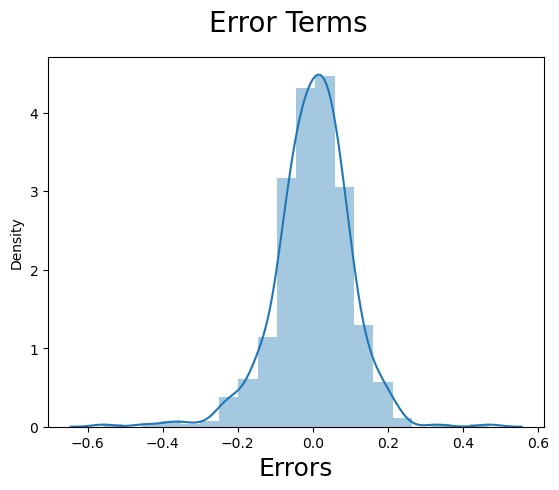

In [113]:
# So, now to check if the error terms are also normally distributed (which is infact, 
# one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

%matplotlib inline

fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [114]:
# take a look at columns
X_train_rfe_new14.columns

Index(['const', 'yr', 'holiday', 'spring',
       'Light_Snow_Light_Rain_Thunderstorm', 'Mist_Cloudy', '3', '5', '6', '8',
       '9', 'Sunday', '7', '10'],
      dtype='object')

In [115]:
print(X_train_rfe_new14.shape)
print(res.shape)

(510, 14)
(510,)


### Scaling Test Data

In [116]:
num_vars=['atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [117]:
# create X and y for test datasets
y_test = df_test.pop('cnt')
X_test = df_test

In [118]:
X_train_new=X_train_rfe_new14.drop(['const'], axis=1)

#### Now we are going to use our model for predictions on test data. We are going to create new dataframew by dropping the columns from test dataset



In [119]:
X_test_new = X_test[X_train_new.columns]

In [120]:
# we are adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [121]:
# check columns 
X_train_rfe_new14.columns

Index(['const', 'yr', 'holiday', 'spring',
       'Light_Snow_Light_Rain_Thunderstorm', 'Mist_Cloudy', '3', '5', '6', '8',
       '9', 'Sunday', '7', '10'],
      dtype='object')

In [122]:
# do the predictions 

y_pred = lm15.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'y_pred')

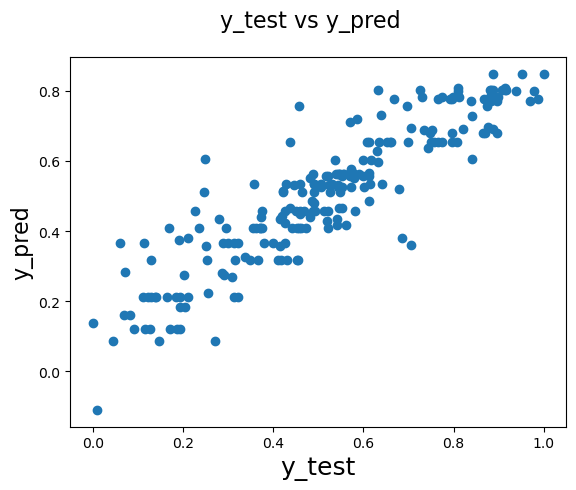

In [125]:
# validating predicted data against the test dataset


fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=16)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)    


#### Now we have a model which can predict the demand of bikes almost accurately. We have checked the actual and the predicted "cnt" overlapped significantly so its indicating that our model is able to identify the change in demand properly.

In [127]:
# Its time to calculate the mean_squared_error and r2_score using sklearn libarary so that we can evaluate our linear regressionmodel performance

# mean_squared_error then we will take the square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.10573120032920401

In [128]:
# r square score calculation for test
r2 = r2_score(y_test, y_pred)

print(r2)


0.8029017439604784


In [129]:
# The model we finalized lm15 have the r square score is 0.797 which is 79.7

X_t=X_train_new.iloc[:,0].values

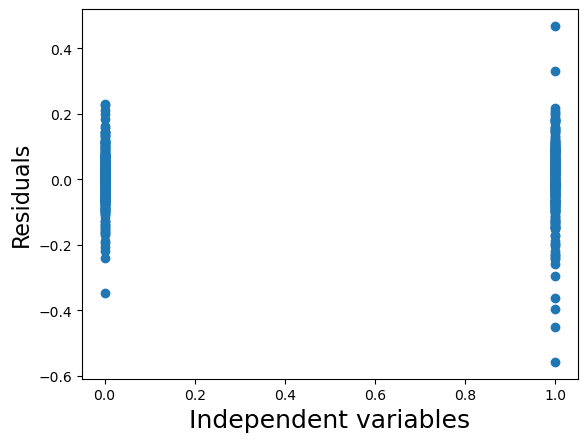

In [131]:
# lets plot the residuals to check the pattern exists 

# In regression analysis, two important assumptions are homoscedasticity (constant variance of residuals) and the absence of autocorrelation (independence of error terms). These assumptions are crucial for the reliability of regression analysis.
# So we are going to check those assumption of homoscedasticity and autocorrelation

plt.figure()
plt.scatter(X_t,res)
fig.suptitle('Independent vars vs res', fontsize=16)              
plt.xlabel('Independent variables', fontsize=18)                         
plt.ylabel('Residuals', fontsize=16)  
plt.show()

#### In time series data, such as yearly observations, regression analysis often encounters autocorrelation due to the inherent relationship between successive periods. This is because future values, like the demand in the coming year, are typically influenced by present or past values, creating interdependence among consecutive observations. Consequently, the error terms across different time points are prone to exhibit correlation due to this interconnection in the underlying data.

In [132]:
# lets check new train dataset which is X_train_new

X_train_new.head()

,yr,holiday,spring,Light_Snow_Light_Rain_Thunderstorm,Mist_Cloudy,3,5,6,8,9,Sunday,7,10
653,1,0,0,0,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,0,1,0
426,1,0,1,0,1,1,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0,0


In [133]:
# lets re-check the columns

print(X_train_rfe_new14.columns)

Index(['const', 'yr', 'holiday', 'spring',
       'Light_Snow_Light_Rain_Thunderstorm', 'Mist_Cloudy', '3', '5', '6', '8',
       '9', 'Sunday', '7', '10'],
      dtype='object')


In [134]:
# lets re-check our model summary

print(lm15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     149.7
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          3.24e-162
Time:                        18:35:43   Log-Likelihood:                 445.00
No. Observations:                 510   AIC:                            -862.0
Df Residuals:                     496   BIC:                            -802.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

### The equation for best fitted line is-

cnt= 0.2469 X yr - 0.0836 X holiday - 0.1980 X Spring - 0.3212 X Light_Snow_Light_Rain_Thunderstorm - 0.0907 X Mist_Cloudy + 0.0635 X 3 + 0.1230 X 5 + 0.1483 X 6 + 0.1538 X 8 + 0.1937 X 9 - 0.0498 X Sunday + 0.1264 X 7 + 0.1168 X 10

### The demand for bikes depends on below variables which we can see
1. yr
2. holiday
3. spring
4. Light_Snow_Light_Rain_Thunderstorm
5. Mist_Cloudy 
6. Sunday
7. Month columns- 3 ,5 ,6, 7, 8, 9, 10

#### Observations-
1. The Demands increases in month 3,5,6,7,8,9,10 
2. The Demands decreases if its holiday, Spring, Light_Snow_Light_Rain_Thunderstorm, Mist_Cloudy and Sunday

## Result
### The final suggestions for the company(BoomBikes) is demand is on higher side in month of 3,5,6,7,8,9 and 10